In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss


import warnings
warnings.filterwarnings("ignore")

In [242]:
df = pd.read_csv("grad.csv", header=0)

In [243]:
print (df.dtypes)

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object


In [323]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


In [324]:
df.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


In [229]:
df.groupby(["rank", "admit"]).size()

rank  admit
1     0        28
      1        33
2     0        97
      1        54
3     0        93
      1        28
4     0        55
      1        12
dtype: int64

###  No of admissions by Rank

In [247]:
ctab = pd.crosstab(df["admit"], df["rank"])
ctab

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


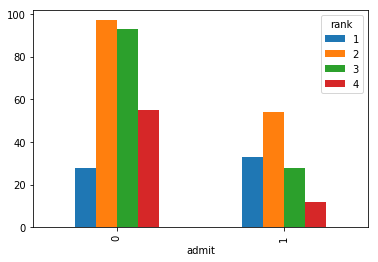

In [246]:
ctab.plot(kind = "bar")

### Bar graph % of admissions by rank

In [232]:
count_no_admit = len(df[df['admit']==0])
count_admit = len(df[df['admit']==1])
pct_of_no_admit = count_no_admit/(count_no_admit+count_admit)
print("percentage of no admissions is", pct_of_no_admit*100)
pct_of_admit = count_admit/(count_no_admit+count_admit)
print("percentage of admissions", pct_of_admit*100)
count_no_admit, count_admit

percentage of no admissions is 68.25
percentage of admissions 31.75


(273, 127)

[Text(0, 0.5, 'Percent of Admissions')]

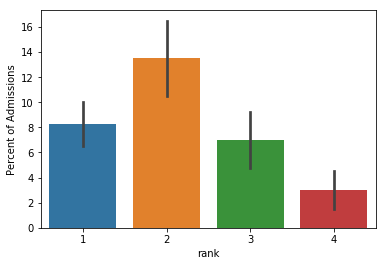

In [233]:
ax = sns.barplot(x="rank", y="admit", data=df, estimator=lambda y: sum(y) / len(df) * 100) # len(y ==1)
ax.set(ylabel="Percent of Admissions")

[Text(0, 0.5, 'Percent of No Admissions')]

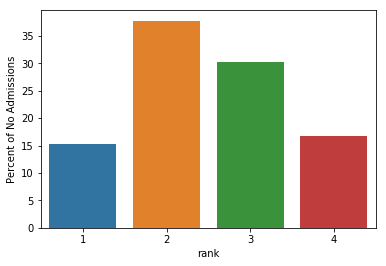

In [234]:
ax1 = sns.barplot(x="rank", y="admit", data=df, estimator=lambda y: len(y == 0) / len(df) * 100)
ax1.set(ylabel="Percent of No Admissions")

In [235]:
df.groupby('admit').mean()

,gre,gpa,rank
admit,,,
0,573.186813,3.343700,2.641026
1,618.897638,3.489213,2.149606


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD44BB39B0>]],
      dtype=object)

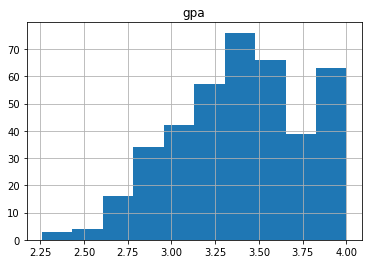

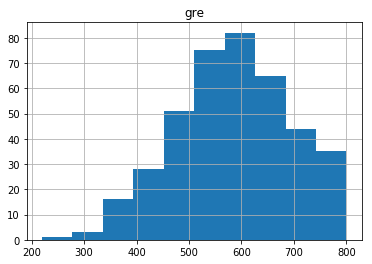

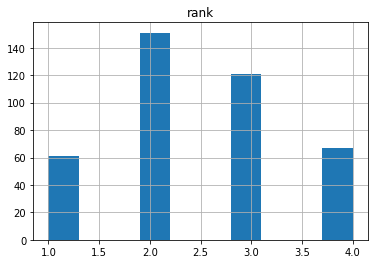

In [236]:
df.hist(column="gpa");df.hist(column="gre"); df.hist(column="rank")

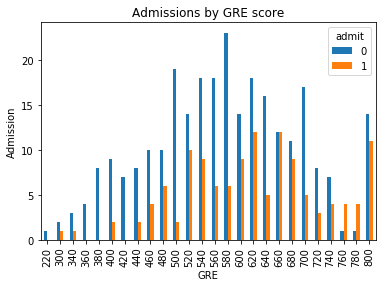

In [237]:
%matplotlib inline
pd.crosstab(df.gre,df.admit).plot(kind='bar')
plt.title('Admissions by GRE score')
plt.xlabel('GRE')
plt.ylabel('Admission')
plt.savefig('Admission by GRE')

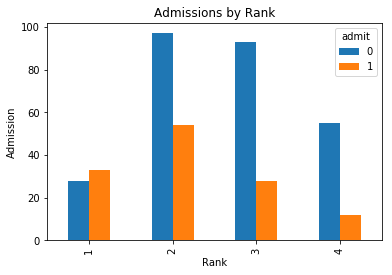

In [238]:
%matplotlib inline
pd.crosstab(df['rank'],df.admit).plot(kind='bar')
plt.title('Admissions by Rank')
plt.xlabel('Rank')
plt.ylabel('Admission')
plt.savefig('Admission by Rank')

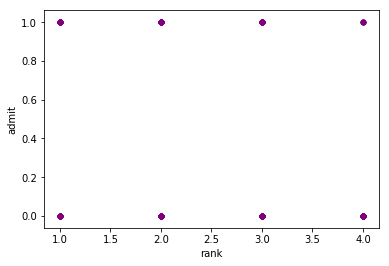

In [223]:
ax2 = df.plot(kind='scatter', x='rank', y='admit', color='purple')    
#ax1 = ax2.twiny()
#_ = df.plot(kind='scatter', x='gpa', y='admit', color='r',ax=ax1)
#_ = df.plot(kind='scatter', x='rank', y='admit', color='purple', ax=ax2)

In [250]:
y=df.admit.values
X = df[['gre','gpa','rank']].values
X.shape, y.shape

((400, 3), (400,))

In [251]:
scalar = StandardScaler().fit(X)
X = scalar.transform(X)

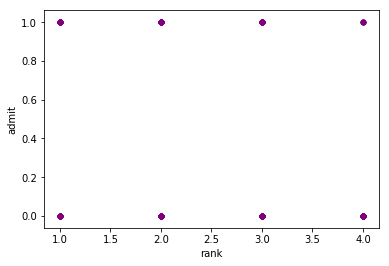

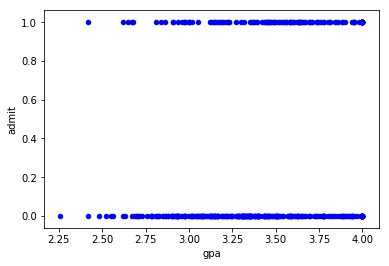

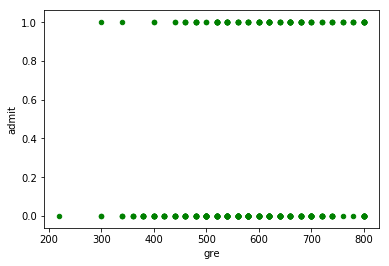

In [255]:
df.plot(kind='scatter', x='rank', y='admit', color='purple');
df.plot(kind='scatter', x='gpa', y='admit', color='b');
df.plot(kind='scatter', x='gre', y='admit', color='g');
ax1 = ax2.twiny()
_ = df.plot(kind='scatter', x='gpa', y='admit', color='r',ax=ax1)
_ = df.plot(kind='scatter', x='gre', y='admit', color='b', ax=ax2)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [334]:
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [335]:
model.intercept_, model.coef_

(array([-0.94007471]), array([[ 0.19173263,  0.36139703, -0.49518519]]))

In [336]:
y_hat = model.predict(X_test)

In [337]:
y_test, y_hat

(array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64))

In [338]:
np.sum(y_test == y_hat) , np.sum(~(y_test == y_hat))

(81, 39)

In [315]:
81/120

0.675

In [311]:
p_hat = model.predict_proba(X_test)[:,1]
log_loss(y_test, p_hat)

0.6012361166659917

In [312]:
pred_neg = (y_test == y_hat)[p_hat < 0.5]
pred_pos = (y_test == y_hat)[p_hat > 0.5]

In [284]:
TN, FN = pred_neg.sum(), (~pred_neg).sum()
TP, FP = pred_pos.sum(), (~pred_pos).sum()
TN, FN, TP, FP

(71, 33, 10, 6)

In [286]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[71,  6],
       [33, 10]], dtype=int64)

In [287]:
accuracy = (TN + TP) / (TN + TP + FN + FP)
accuracy

0.675

In [295]:
auc = roc_auc_score(y_test, p_hat)
auc

0.7106614315916641

In [288]:
accuracy_score(y_test, y_hat)

0.675

In [289]:
precision_score(y_test, y_hat)

0.625

In [290]:
recall_score(y_test, y_hat)

0.23255813953488372

In [292]:
cmdf = pd.DataFrame(cm, index=['Predict Rejection','Predict Admission'], columns=['Actual Rejection', 'Actual Admission'])
cmdf

,Actual Rejection,Actual Admission
Predict Rejection,71,6
Predict Admission,33,10


In [316]:
# at what weight is the probability 0.5
# midpoint = -B0 + ln(p/1-p) / B1
midpoint = ((- model.intercept_[0]) + 0 ) / model.coef_[0][0] 
midpoint

4.7668115652018495

In [321]:
X_test.shape, y_test.shape

((120, 3), (120,))

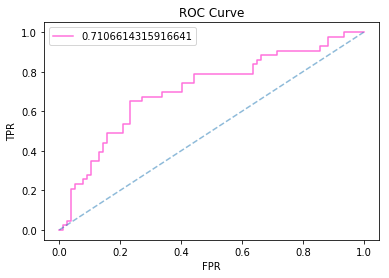

In [296]:
fpr, tpr, thr = roc_curve(y_test, p_hat)
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [358]:
searchCV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=10
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='lbfgs'
        ,tol=10
    )
modelcv = searchCV.fit(X_train, y_train)

In [359]:
y_hatcv = cvmodel.predict(X_test)

In [360]:
np.sum(y_test == y_hatcv) , np.sum(~(y_test == y_hatcv))

(77, 43)

In [361]:
77/120

0.6416666666666667

In [372]:
df[['is_rank1', 'is_rank2', 'is_rank3', 'is_rank4']] = pd.get_dummies(df['rank']).iloc[:, ]
df.head(3)

,admit,gre,gpa,rank,is_rank1,is_rank2,is_rank3,is_rank4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0


In [373]:
newy = df.admit
newX = df[['gre', 'gpa', 'is_rank1', 'is_rank2', 'is_rank3', 'is_rank4']]

In [374]:
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, newy, test_size=0.30, random_state=40)

In [375]:
scalar = StandardScaler().fit(newX_train)
nX_train = scalar.transform(newX_train)
nX_test = scalar.transform(newX_test)

In [376]:
newmodel = LogisticRegression(solver='lbfgs').fit(nX_train, newy_train)

In [377]:
newmodel.intercept_, newmodel.coef_

(array([-0.95928775]),
 array([[ 0.19809277,  0.35368279,  0.24500086,  0.17445065, -0.04572062,
         -0.4056767 ]]))

In [378]:
yhat = newmodel.predict(nX_test)

In [379]:
accuracy_score(newy_test, yhat)

0.65

## CV, Feature engineering did not help. Splitting data by labels

In [ ]:
df0 = df['admit']==0
df1 = df['admit'] ==1
X0_train, X0_test, y0_train, y0_test = train_test_split(newX, newy, test_size=0.30, random_state=40)